In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv
import torch

hello


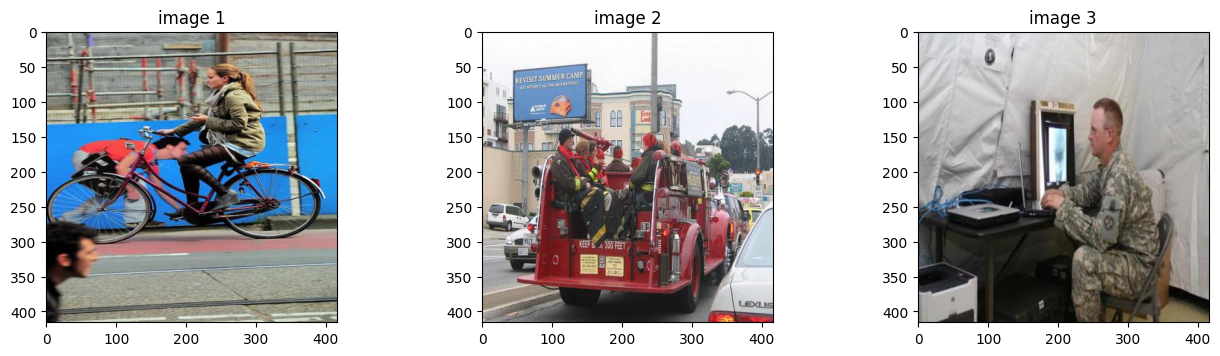

In [20]:
displayImages = [
    "/kaggle/input/human-dataset/train/images/000000049371_jpg.rf.3cb507cbec84300f89f58bc43aa01bd9.jpg",
    "/kaggle/input/human-dataset/train/images/000000062251_jpg.rf.d40964e43b27190922303da0d8a2c568.jpg",
    "/kaggle/input/human-dataset/train/images/000000131825_jpg.rf.f1182587b021bbf76fa55f8bfafd65d8.jpg"
]

fig , ax = plt.subplots(1 ,3 ,figsize=(15,7))

#print(fig)
#print(ax)
print("hello")
for i in range(3):
    ax[i].set_title("image {num}".format(num=i+1))
    img = cv.imread(displayImages[i])
    ax[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplots_adjust(wspace=0.5)
plt.show()

In [15]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 15.7 MB/s eta 0:00:00a 0:00:01


In [16]:
from ultralytics import YOLO

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Setup complete. Using torch 2.5.1+cu121 (CPU)


In [5]:
model = YOLO('yolo11m.pt')
model.train(
    data=r"/kaggle/input/human-dataset/data.yaml",  # Path to the data.yaml file
    imgsz=416,         # Image size (you can change this)
    batch=32,          # Batch size (adjust according to your system's GPU memory)
    epochs=30,         # Number of epochs (adjust as needed)
    device='0'          # Use GPU (0 for the first GPU, or use 'cpu' if you don't have a GPU)
)

Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/input/human-dataset/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /kaggle/input/human-dataset/train/labels... 10933 images, 20 backgrounds, 0 corrupt: 100%|██████████| 10933/10933 [00:23<00:00, 458.78it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/human-dataset/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 35514. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/human-dataset/valid/labels... 1570 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1570/1570 [00:06<00:00, 233.37it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/human-dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 5440. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       7.6G      1.667      1.525      1.511        136        416: 100%|██████████| 342/342 [03:40<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]


                   all       1570       5440      0.723      0.186      0.178     0.0748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.56G      1.778      1.661      1.612        127        416: 100%|██████████| 342/342 [03:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.792      0.223      0.234      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.58G      1.713      1.567      1.564        115        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.92it/s]


                   all       1570       5440      0.745      0.207      0.212     0.0961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.58G      1.684      1.516      1.551        101        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.90it/s]


                   all       1570       5440      0.764      0.213      0.219      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.58G       1.63      1.448      1.512        105        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.92it/s]


                   all       1570       5440      0.782      0.215      0.234      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.58G      1.589      1.389      1.487        101        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.91it/s]


                   all       1570       5440      0.802      0.246      0.266      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.58G      1.551      1.327      1.461        138        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.828       0.26      0.295      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.58G      1.533      1.296      1.442        125        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.836      0.274      0.307      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.58G      1.506      1.274      1.431        178        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.90it/s]


                   all       1570       5440      0.811      0.278      0.295      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.58G      1.489      1.229      1.417        174        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.838      0.279      0.309      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.58G      1.464      1.203      1.398        105        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.847      0.283      0.312      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.58G       1.45      1.183      1.393        101        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.837      0.285      0.317      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.58G      1.434      1.159      1.377        155        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.93it/s]

                   all       1570       5440       0.85      0.281      0.322      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.58G      1.421      1.133       1.37        121        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.849      0.284      0.337       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.58G      1.409      1.117       1.36        120        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.352      0.285      0.319      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.58G      1.378      1.091      1.349         84        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.851      0.287       0.33      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.58G      1.373      1.074       1.34        115        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.338      0.369      0.349      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.58G      1.357      1.057      1.332         99        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440       0.31      0.375      0.355      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.58G      1.351      1.041      1.326        115        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.393      0.373      0.365      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.58G      1.337      1.027      1.315        162        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.484      0.389      0.379      0.229


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.58G      1.335     0.9609      1.321         52        416: 100%|██████████| 342/342 [03:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440      0.615      0.334      0.365      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.58G      1.306     0.9229      1.299         76        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.96it/s]

                   all       1570       5440      0.753      0.319      0.366       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.58G      1.285     0.8991      1.285         75        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]

                   all       1570       5440       0.56      0.373      0.385      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.58G      1.268     0.8796      1.279         62        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]

                   all       1570       5440      0.438      0.358      0.378      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.58G      1.246     0.8575      1.262         58        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.96it/s]

                   all       1570       5440      0.378       0.41      0.393      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.58G      1.231     0.8338      1.258         54        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]

                   all       1570       5440      0.474      0.389      0.402      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.58G      1.215     0.8157      1.248         54        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]

                   all       1570       5440      0.514      0.388      0.399      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.58G      1.198     0.7996      1.236         49        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]

                   all       1570       5440      0.451      0.437      0.416      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.58G      1.186     0.7787      1.229        103        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.98it/s]

                   all       1570       5440      0.598      0.391      0.424      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.58G      1.167     0.7679      1.218         42        416: 100%|██████████| 342/342 [03:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]

                   all       1570       5440      0.513      0.389      0.418       0.26



30 epochs completed in 1.913 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 40.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]


                   all       1570       5440      0.594      0.391      0.424      0.264
                 Human       1556       5406      0.722      0.635      0.686      0.406
                Human          31         34      0.466      0.147      0.162      0.122


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9eae6c1ff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

(1200, 2400, 3)


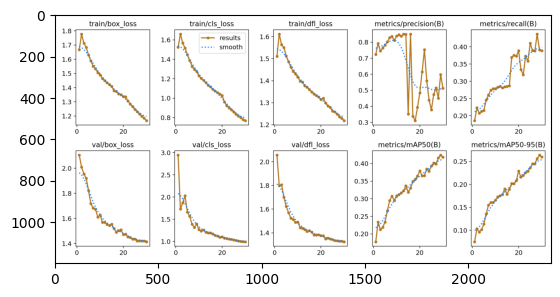

In [17]:
img = cv.imread("/kaggle/working/runs/detect/train2/results.png")
print(img.shape)
plt.imshow(img)
plt.show()

(1792, 1792, 3)


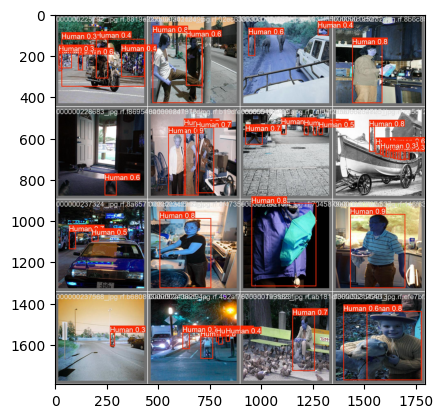

In [8]:
img = cv.imread("/kaggle/working/runs/detect/train2/val_batch2_pred.jpg")
print(img.shape)
plt.imshow(img)
plt.show()

In [24]:
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")
result = model.predict("/kaggle/input/testimages/Test/images (1).jpeg")


image 1/1 /kaggle/input/testimages/Test/images (1).jpeg: 288x416 2 Humans, 405.8ms
Speed: 15.0ms preprocess, 405.8ms inference, 19.5ms postprocess per image at shape (1, 3, 288, 416)


In [32]:
result = model.predict("/kaggle/input/testimages/Test/images (1).jpeg")


boxes = result[0].boxes  
labels = result[0].names  
confidence = boxes.conf  


for i in range(len(boxes)):
    print(f"Prediction {i+1}:")
    print(f"Class: {labels[boxes.cls[i].item()]}")
    print(f"Bounding box: {boxes.xywh[i]}")  
    print(f"Confidence: {confidence[i]:.4f}")



image 1/1 /kaggle/input/testimages/Test/images (1).jpeg: 288x416 2 Humans, 295.8ms
Speed: 1.1ms preprocess, 295.8ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 416)
Prediction 1:
Class: Human
Bounding box: tensor([ 65.5954,  93.9208, 126.0660, 177.2224])
Confidence: 0.8960
Prediction 2:
Class: Human
Bounding box: tensor([201.2050,  93.8143, 146.3701, 176.4113])
Confidence: 0.8672



image 1/1 /kaggle/input/testimages/Test/images (1).jpeg: 288x416 2 Humans, 291.6ms
Speed: 1.4ms preprocess, 291.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 416)


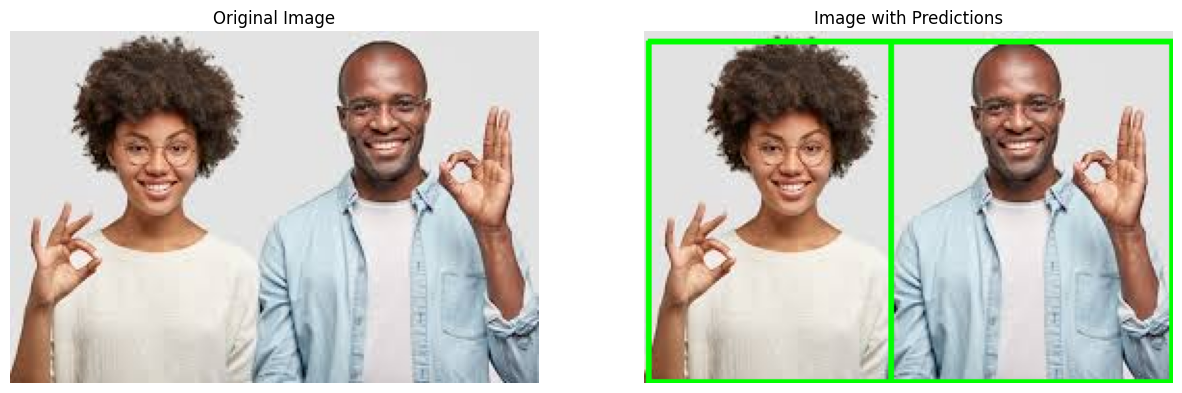

In [33]:
image_path = "/kaggle/input/testimages/Test/images (1).jpeg"
original_img = cv.imread(image_path)

# Predict with YOLO model
result = model.predict(image_path)

# Accessing the predictions
boxes = result[0].boxes  # Bounding boxes (x1, y1, x2, y2)
labels = result[0].names  # Class names
confidence = boxes.conf  # Confidence scores

# Annotate the image with bounding boxes
annotated_img = original_img.copy()

# Draw bounding boxes and labels on the image
for i in range(len(boxes)):
    # Get coordinates of the box
    x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy()
    class_id = int(boxes.cls[i].cpu().numpy())
    label = labels[class_id]
    score = confidence[i].cpu().numpy()

    # Draw rectangle around the detected object
    cv.rectangle(annotated_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    
    # Display the label and confidence score
    cv.putText(annotated_img, f"{label} {score:.2f}", (int(x1), int(y1)-10),
               cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert the images from BGR to RGB (for correct color display in Matplotlib)
original_img_rgb = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
annotated_img_rgb = cv.cvtColor(annotated_img, cv.COLOR_BGR2RGB)

# Plot the original and annotated images
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot original image
ax[0].imshow(original_img_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plot annotated image
ax[1].imshow(annotated_img_rgb)
ax[1].set_title('Image with Predictions')
ax[1].axis('off')

plt.show()


image 1/1 /kaggle/input/testimages/Test/images (1).jpeg: 288x416 2 Humans, 281.1ms
Speed: 1.2ms preprocess, 281.1ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 416)


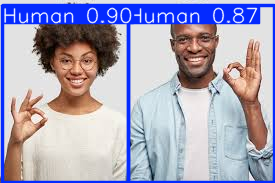

In [36]:

image_path = "/kaggle/input/testimages/Test/images (1).jpeg"
result = model.predict(image_path)


for res in result:
    res.show() 
